In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import TSLA dataset
df = pd.read_excel("Tesla.xlsx",sheet_name="TSLA2")
df = df.sort_values(by=['Date'])
df.set_index(keys="Date",inplace=True)

In [3]:
#Calculating the yield
df['Return'] = df["Close"].pct_change()

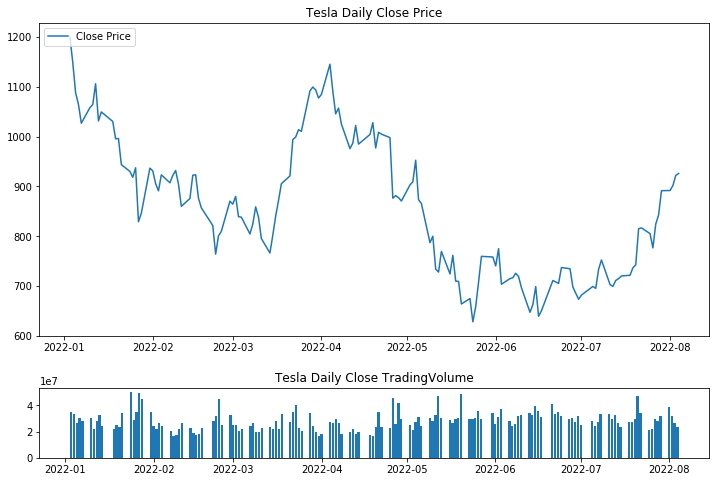

In [4]:
#The top Plot consisting of daily closing Prices
top=plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
top.plot(df.index,df.Close,label="Close Price")
plt.title('Tesla Daily Close Price')
plt.legend(loc=2)
#The bottom Plot consisting of daily trading volume
bottom=plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(df.index,df.Volume)
plt.title('Tesla Daily Close TradingVolume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

Text(0.5,1,'Tesla Daily Return')

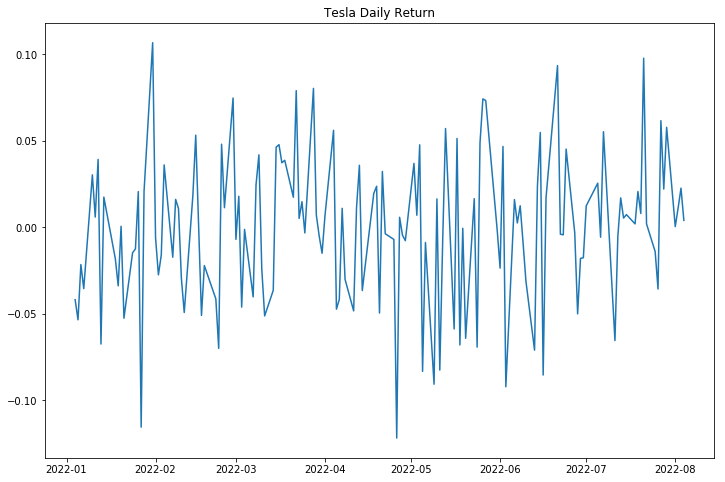

In [5]:
#Tesla Daily Return Graph
plt.figure(figsize=(12,8))
plt.plot(df.Return)
plt.title('Tesla Daily Return')

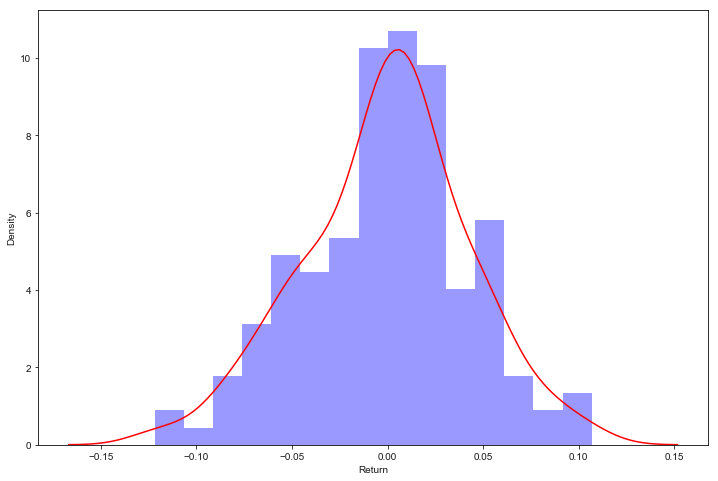

In [6]:
#Histograms and kernel density plots of returns
r=df.Return[1:]
plt.figure(figsize=(12,8))
sns.distplot(r, bins = 15, kde = False, hist_kws = {'color':'blue'},norm_hist=True)
sns.distplot(r, hist = False, kde_kws = {'color':'red', 'linestyle':'-'},
             norm_hist = True)
sns.set(font_scale=2)
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

In [7]:
#99% VaR and ES

T = len(r)
alpha = 0.01  
print('  =====================================')
print('  ==   Univariate unconditionnal VaR ==')
print('  =====================================')
print(' ')
print("  Coverate Rate = %1.2f" % (alpha))
print("  Sample size = %4.0f" % (T))
# st.norm.ppf(alpha)is the inverse function of the cumulative standard normal distribution
VaR_univariate= np.mean(r) - np.std(r, ddof=1) * st.norm.ppf(alpha)  
ES = np.mean(r) + st.norm.pdf(st.norm.ppf(1-alpha)) * np.std(r, ddof=1) / alpha
print("  Asset :  Expected returns = %2.6f    Variance of returns = %2.6f " % ( float(np.mean(r)), float(np.var(r, ddof=1))))
print("  Asset :  Univariate VaR = %2.6f  Univariate ES = %2.6f" % ( VaR_univariate, ES))


  ==   Univariate unconditionnal VaR ==


 

  Coverate Rate = 0.01

  Sample size =  147

  Asset :  Expected returns = -0.000834    Variance of returns = 0.001851 

  Asset :  Univariate VaR = 0.099243  Univariate ES = 0.113820


In [8]:
#95% VaR and ES

T = len(r)
alpha = 0.05
print('  =====================================')
print('  ==   Univariate unconditionnal VaR ==')
print('  =====================================')
print(' ')
print("  Coverate Rate = %1.2f" % (alpha))
print("  Sample size = %4.0f" % (T))
# st.norm.ppf(alpha)is the inverse function of the cumulative standard normal distribution
VaR_univariate= np.mean(r) - np.std(r, ddof=1) * st.norm.ppf(alpha)  
ES = np.mean(r) + st.norm.pdf(st.norm.ppf(1-alpha)) * np.std(r, ddof=1) / alpha
print("  Asset :  Expected returns = %2.6f    Variance of returns = %2.6f " % ( float(np.mean(r)), float(np.var(r, ddof=1))))
print("  Asset :  Univariate VaR = %2.6f  Univariate ES = %2.6f" % ( VaR_univariate, ES))


  ==   Univariate unconditionnal VaR ==


 

  Coverate Rate = 0.05

  Sample size =  147

  Asset :  Expected returns = -0.000834    Variance of returns = 0.001851 

  Asset :  Univariate VaR = 0.069926  Univariate ES = 0.087901


In [9]:
#90% VaR and ES

T = len(r)
alpha = 0.1
print('  =====================================')
print('  ==   Univariate unconditionnal VaR ==')
print('  =====================================')
print(' ')
print("  Coverate Rate = %1.2f" % (alpha))
print("  Sample size = %4.0f" % (T))
# st.norm.ppf(alpha)is the inverse function of the cumulative standard normal distribution
VaR_univariate= np.mean(r) - np.std(r, ddof=1) * st.norm.ppf(alpha)  
ES = np.mean(r) + st.norm.pdf(st.norm.ppf(1-alpha)) * np.std(r, ddof=1) / alpha
print("  Asset :  Expected returns = %2.6f    Variance of returns = %2.6f " % ( float(np.mean(r)), float(np.var(r, ddof=1))))
print("  Asset :  Univariate VaR = %2.6f  Univariate ES = %2.6f" % ( VaR_univariate, ES))


  ==   Univariate unconditionnal VaR ==


 

  Coverate Rate = 0.10

  Sample size =  147

  Asset :  Expected returns = -0.000834    Variance of returns = 0.001851 

  Asset :  Univariate VaR = 0.054297  Univariate ES = 0.074663
